## Chapter 4: Prediction

Import standard libraries and read in data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf

## 4.1 Predicting Body Fat

In [2]:
fat = pd.read_csv("data/fat.csv")
fat.head()

,brozek,siri,density,age,weight,height,adipos,free,neck,chest,abdom,hip,thigh,knee,ankle,biceps,forearm,wrist
0,12.6,12.3,1.0708,23,154.25,67.75,23.7,134.9,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.9,6.1,1.0853,22,173.25,72.25,23.4,161.3,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,24.6,25.3,1.0414,22,154.00,66.25,24.7,116.0,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.9,10.4,1.0751,26,184.75,72.25,24.9,164.7,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,27.8,28.7,1.0340,24,184.25,71.25,25.6,133.1,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


Fit the fat prediction model and produce summary

In [3]:
lmod = smf.ols(formula=
    'brozek ~ age + weight + height + neck + chest + abdom + hip + thigh + knee + ankle + biceps + forearm + wrist',
               data=fat).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 brozek   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     54.63
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           7.98e-64
Time:                        17:13:42   Log-Likelihood:                -698.96
No. Observations:                 252   AIC:                             1426.
Df Residuals:                     238   BIC:                             1475.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.2925     16.070     -0.952      0.342     -46.950      16.365
age            0.0568      0.030      1.895      0.059      -0.002       0.116
weight        -0.0803      0.050     -1.620      0.107      -0.178       0.017
height        -0.0646      0.089     -0.726      0.468      -0.240       0.111
neck          -0.4375      0.215     -2.032      0.043      -0.862      -0.013
chest         -0.0236      0.092     -0.257      0.797      -0.205       0.157
abdom          0.8854      0.080     11.057      0.000       0.728       1.043
hip           -0.1984      0.135     -1.468      0.143      -0.465       0.068
thigh          0.2319      0.134      1.734      0.084      -0.032       0.495
knee          -0.0117      0.224     -0.052      0.958      -0.453       0.430
ankle          0.1635      0.205      0.797      0.426      -0.241       0.568
biceps         0.1528      0.159      0.964      0.336      -0.159       0.465
forearm        0.4305      0.184      2.334      0.020       0.067       0.794
wrist         -1.4765      0.496     -2.980      0.003      -2.453      -0.500
==============================================================================
Omnibus:                        4.232   Durbin-Watson:                   1.787
Prob(Omnibus):                  0.121   Jarque-Bera (JB):                2.743
Skew:                          -0.006   Prob(JB):                        0.254
Kurtosis:                       2.489   Cond. No.                     1.78e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Construct the predictor vector

In [4]:
x0 = fat.loc[:,("age","weight","height","neck","chest","abdom","hip","thigh","knee","ankle","biceps","forearm","wrist")].median()
x0 = np.append(1, x0.ravel())
x0

array([  1.  ,  43.  , 176.5 ,  70.  ,  38.  ,  99.65,  90.95,  99.3 ,
        59.  ,  38.5 ,  22.8 ,  32.05,  28.7 ,  18.3 ])

Compute the prediction

In [5]:
np.dot(x0, lmod.params)

17.493220100555504

Compute prediction using sm predict() function. Note how x0 is constructed with variable labels

In [6]:
x0 = fat.loc[:,("age","weight","height","neck","chest","abdom","hip","thigh","knee","ankle","biceps","forearm","wrist")].median()
x0 = sm.tools.add_constant(pd.DataFrame(x0).T)
lmod.predict(x0)

C:\Users\Diogo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0    17.49322
dtype: float64

In [7]:
x0

,age,weight,height,neck,chest,abdom,hip,thigh,knee,ankle,biceps,forearm,wrist
0,43.0,176.5,70.0,38.0,99.65,90.95,99.3,59.0,38.5,22.8,32.05,28.7,18.3


We can get confidence and prediction intervals also:

In [8]:
p = lmod.get_prediction(x0)
p.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,17.49322,0.278665,16.944255,18.042185,9.61783,25.36861


## 4.2 Autoregression

Load in the airline passenger data and plot

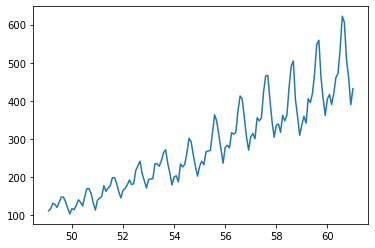

In [9]:
air = pd.read_csv("data/airpass.csv")
plt.plot(air['year'], air['pass'])

In [10]:
X = sm.tools.add_constant(air['year'])
y = np.log(air['pass'])
lmod = sm.OLS(y,X).fit()

C:\Users\Diogo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Put the fitted line onto the plot:

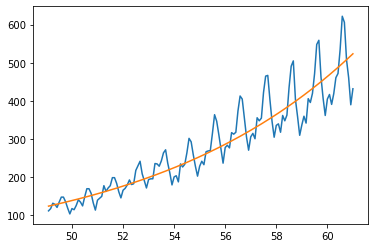

In [11]:
plt.plot(air['year'], air['pass'])
plt.plot(air['year'],np.exp(lmod.predict()))

Construct the lagged variables and drop the missing values

In [12]:
air['lag1'] = np.log(air['pass']).shift(1)
air['lag12'] = np.log(air['pass']).shift(12)
air['lag13'] = np.log(air['pass']).shift(13)
airlag = air.dropna()

Fit the lagged model

In [13]:
X = sm.tools.add_constant(airlag.loc[:,('lag1','lag12','lag13')])
y = np.log(airlag['pass'])
lmod = sm.OLS(y,X).fit()
lmod.summary()

C:\Users\Diogo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   pass   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     3892.
Date:                Tue, 23 Jun 2020   Prob (F-statistic):          9.50e-125
Time:                        17:13:43   Log-Likelihood:                 232.55
No. Observations:                 131   AIC:                            -457.1
Df Residuals:                     127   BIC:                            -445.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1385      0.054      2.583      0.011       0.032       0.245
lag1           0.6923      0.062     11.192      0.000       0.570       0.815
lag12          0.9215      0.035     26.532      0.000       0.853       0.990
lag13         -0.6321      0.068     -9.340      0.000      -0.766      -0.498
==============================================================================
Omnibus:                        4.849   Durbin-Watson:                   2.274
Prob(Omnibus):                  0.089   Jarque-Bera (JB):                5.148
Skew:                           0.254   Prob(JB):                       0.0762
Kurtosis:                       3.828   Cond. No.                         244.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Show the fitted model on top of the data. First year of data is not predicted because of lagging.

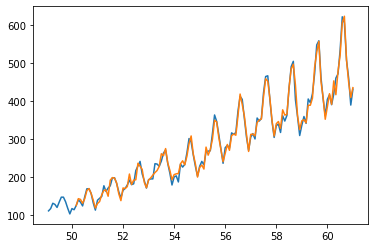

In [14]:
plt.plot(air['year'], air['pass'])
plt.plot(airlag['year'],np.exp(lmod.predict()))

Find the appropriate lagged variables:

In [15]:
x0 = np.log(air['pass'].iloc[[-1,-12,-13]])
x0

143    6.068426
132    6.033086
131    6.003887
Name: pass, dtype: float64

Make the prediction:

In [16]:
x0 = pd.DataFrame([{"const":1,"lag1": 6.068426, "lag12": 6.033086, "lag13": 6.003887}])
x0

,const,lag1,lag12,lag13
0,1,6.068426,6.033086,6.003887


In [17]:
p = lmod.get_prediction(x0)
p.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,6.103985,0.006375,6.09137,6.116601,6.020619,6.187351
